Trading Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'History.csv'  # Ensure this is the correct path to your file
trades = pd.read_csv(file_path)

# Display the first few rows of the dataframe
trades.head()


,DATE/TIME,TYPE,ORDER#,BET#,REL. ORDER#,PRODUCT,VALUE DATE,STAKE,PRICE,BOUNDARY PRICE,...,SETTLEMENT PRICE,RESULT,PAYOUT,TYPE.1,EXPIRY.1,STRIKE PRICE,SETTLEMENT.1,SETTLEMENT PRICE.1,PROFIT,LOSS
0,10 Dec 2024 01:21:11,Close Bet,O2-DD-9DE7NT,T2-DD-5PK6RH,O2-DD-9DE7FW,Japan 225 - Cash,-,0.5,"39,352.35",-,...,-,-,-,-,-,-,-,-,-,-
1,10 Dec 2024 01:11:54,Close Bet,O2-DD-9DE7EP,T2-DD-5PK6K6,O2-DD-9DE7EJ,Japan 225 - Cash,-,0.5,"39,300.45",-,...,-,-,-,-,-,-,-,-,-,-
2,10 Dec 2024 01:11:17,Close Bet,O2-DD-9DE7EE,T2-DD-5PK6JZ,O2-DD-9DE78G,Japan 225 - Cash,-,0.5,"39,298.29",-,...,-,-,-,-,-,-,-,-,-,-
3,10 Dec 2024 01:03:17,Close Bet,O2-DD-9DE779,T2-DD-5PK6F9,O2-DD-9DDNBJ,US NDAQ 100 - Cash,-,0.5,"21,441.61",-,...,-,-,-,-,-,-,-,-,-,-
4,10 Dec 2024 01:03:08,Close Bet,O2-DD-9DE775,T2-DD-5PK6F5,O2-DD-9DE70B,Japan 225 - Cash,-,0.5,"39,312.35",-,...,-,-,-,-,-,-,-,-,-,-


In [2]:
import pandas as pd

# Load your trading data
file_path = 'History.csv'  # Ensure this is the correct path to your file
trades = pd.read_csv(file_path)

# Define a function to check if a column should be deleted
def should_drop_column(column):
    return (column.isnull().all() or (column == '-').all())

# Identify columns to drop
columns_to_drop = [col for col in trades.columns if should_drop_column(trades[col])]

# Drop the identified columns
trades.drop(columns=columns_to_drop, inplace=True)

# Save the refined DataFrame to a new CSV file
trades.to_csv('refined_history.csv', index=False)

# Display the remaining columns for verification
print(f"Columns dropped: {columns_to_drop}")
print("Remaining columns:")
print(trades.columns)


Columns dropped: ['VALUE DATE', 'BOUNDARY PRICE', 'STOP LOSS', 'TAKE PROFIT', 'MARGIN (GBP)', 'AMOUNT EXCLUDING FEE', 'FEE', 'HOLDING COST - AMOUNT', 'HOLDING RATE', 'HOLDING COST (GBP)', 'HOLDING COST - OFFSET (GBP)', 'HOLDING COST - TOTAL (GBP)', 'PREMIUM', 'REFUND %', 'TARGET', 'WIN PAYOUT', 'DRAW PAYOUT', 'OPEN', 'EXPIRY', 'SETTLEMENT', 'SETTLEMENT PRICE', 'RESULT', 'PAYOUT', 'TYPE.1', 'EXPIRY.1', 'STRIKE PRICE', 'SETTLEMENT.1', 'SETTLEMENT PRICE.1', 'PROFIT', 'LOSS']
Remaining columns:
Index(['DATE/TIME', 'TYPE', 'ORDER#', 'BET#', 'REL. ORDER#', 'PRODUCT',
       'STAKE', 'PRICE', 'VALUE (GBP)', 'AMOUNT (GBP)', 'BALANCE (GBP)'],
      dtype='object')


In [3]:
# let's check the working directory (CWD current WD)
import os
print(os.getcwd())
# actually we specified just the filename with file_path ='History.csv'. That's the relative path isntead of absoulte path C:\\Users\\user\\Documents\\Algo Trading\\Trading Analytics
# if we need the change the CWD we type the script below
# import os
# os.chdir('C:\\Users\\user\\Documents\\Algo Trading\\Trading Analytics')



c:\Users\user\Documents\Algo Trading\Trading Analytics


In [4]:
# Check the columns and data types
print(trades.info())

# Check for missing values
print(trades.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE/TIME      511 non-null    object 
 1   TYPE           511 non-null    object 
 2   ORDER#         511 non-null    object 
 3   BET#           511 non-null    object 
 4   REL. ORDER#    511 non-null    object 
 5   PRODUCT        511 non-null    object 
 6   STAKE          511 non-null    float64
 7   PRICE          511 non-null    object 
 8   VALUE (GBP)    511 non-null    object 
 9   AMOUNT (GBP)   511 non-null    float64
 10  BALANCE (GBP)  511 non-null    object 
dtypes: float64(2), object(9)
memory usage: 44.0+ KB
None
DATE/TIME        0
TYPE             0
ORDER#           0
BET#             0
REL. ORDER#      0
PRODUCT          0
STAKE            0
PRICE            0
VALUE (GBP)      0
AMOUNT (GBP)     0
BALANCE (GBP)    0
dtype: int64


In [5]:
# Total number of trades
total_trades = len(trades)
print(f'Total Number of Trades: {total_trades}')


Total Number of Trades: 511


In [6]:
# Calculate win rate
wins = trades[trades['AMOUNT (GBP)'] > 0]  # Replace 'Profit' with your actual profit/loss column name
win_rate = len(wins) / total_trades * 100
print(f'Win Rate: {win_rate:.2f}%')


Win Rate: 45.79%


In [7]:
# Rename the 'AMOUNT (GBP)' column to 'PL'
trades.rename(columns={'AMOUNT (GBP)': 'PL'}, inplace=True)


In [8]:
print(trades.columns)

Index(['DATE/TIME', 'TYPE', 'ORDER#', 'BET#', 'REL. ORDER#', 'PRODUCT',
       'STAKE', 'PRICE', 'VALUE (GBP)', 'PL', 'BALANCE (GBP)'],
      dtype='object')


In [9]:
trades.head()

,DATE/TIME,TYPE,ORDER#,BET#,REL. ORDER#,PRODUCT,STAKE,PRICE,VALUE (GBP),PL,BALANCE (GBP)
0,10 Dec 2024 01:21:11,Close Bet,O2-DD-9DE7NT,T2-DD-5PK6RH,O2-DD-9DE7FW,Japan 225 - Cash,0.5,"39,352.35","19,676.17",18.39,"99,312.66"
1,10 Dec 2024 01:11:54,Close Bet,O2-DD-9DE7EP,T2-DD-5PK6K6,O2-DD-9DE7EJ,Japan 225 - Cash,0.5,"39,300.45","19,650.22",-1.05,"99,294.27"
2,10 Dec 2024 01:11:17,Close Bet,O2-DD-9DE7EE,T2-DD-5PK6JZ,O2-DD-9DE78G,Japan 225 - Cash,0.5,"39,298.29","19,649.14",-18.19,"99,295.32"
3,10 Dec 2024 01:03:17,Close Bet,O2-DD-9DE779,T2-DD-5PK6F9,O2-DD-9DDNBJ,US NDAQ 100 - Cash,0.5,"21,441.61","10,720.80",7.33,"99,313.51"
4,10 Dec 2024 01:03:08,Close Bet,O2-DD-9DE775,T2-DD-5PK6F5,O2-DD-9DE70B,Japan 225 - Cash,0.5,"39,312.35","19,656.17",-0.71,"99,306.18"


In [10]:
trades.describe()

,STAKE,PL
count,511.000000,511.000000
mean,1.305284,-1.319530
std,2.344637,56.988234
min,0.100000,-516.000000
25%,0.300000,-9.535000
50%,0.500000,-0.670000
75%,2.000000,6.445000
max,20.000000,581.600000


In [11]:
# This will ignore any errors for columns that don't exist
trades.drop(columns=['VALUE DATE','BOUNDARY PRICE', 'STOP LOSS',
       'TAKE PROFIT', 'MARGIN (GBP)'], 
               inplace=True, errors='ignore')

We have cleaned the history file and name the new file as "refined_history.csv". It's the file we are working with. Let's progress!

In [12]:
total_trades = len(trades)
wins = trades[trades['PL'] > 0]
win_rate = len(wins) / total_trades * 100
print(f'Win Rate: {win_rate:.2f}%')


Win Rate: 45.79%


EDA

Distribution of P&L

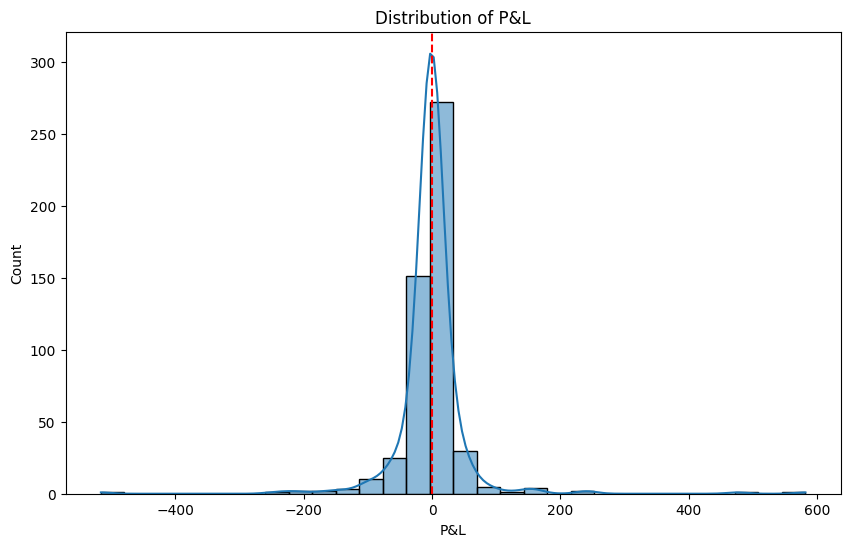

In [13]:
#Visualize the distribution of P&L values.
plt.figure(figsize=(10, 6))
sns.histplot(trades['PL'], bins=30, kde=True)
plt.title('Distribution of P&L')
plt.xlabel('P&L')
plt.axvline(0, color='red', linestyle='--') # Highlight break-even point<br>plt.show()



Cumulative Profit Curve

Win Rate Visualization

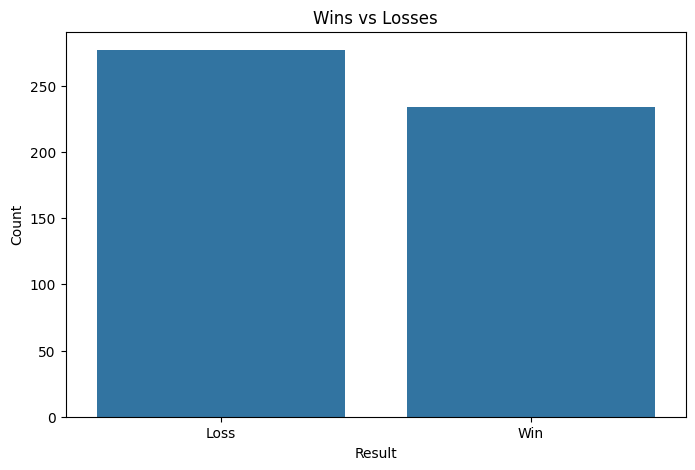

In [14]:
# Visualize the number of wins and losses
win_counts = trades['PL'].apply(lambda x: 'Win' if x > 0 else 'Loss').value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title('Wins vs Losses')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

Average P&L per Trade

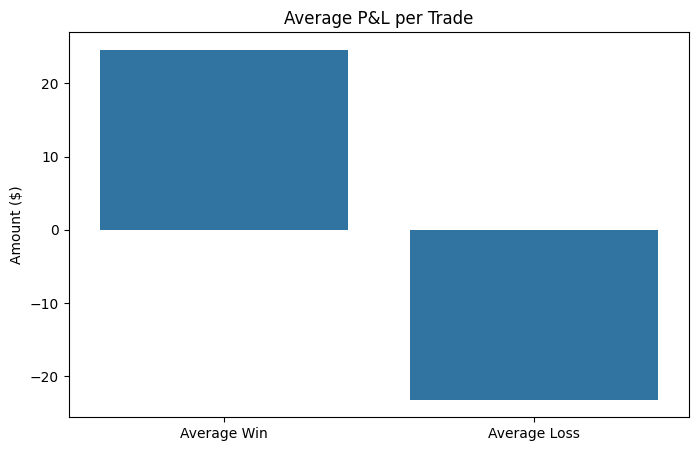

In [15]:
# Show average P&L for wins and losses
avg_win = trades[trades['PL'] > 0]['PL'].mean()
avg_loss = trades[trades['PL'] <= 0]['PL'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=['Average Win', 'Average Loss'], y=[avg_win, avg_loss])
plt.title('Average P&L per Trade')
plt.ylabel('Amount ($)')
plt.show()

In [16]:
# Calculate and print average win and loss
avg_win = trades[trades['PL'] > 0]['PL'].mean()
avg_loss = trades[trades['PL'] <= 0]['PL'].mean()

# Display the results
print(f'Average win per trade: ${avg_win:.2f}')
print(f'Average loss per trade: ${avg_loss:.2f}')


Average win per trade: $24.57
Average loss per trade: $-23.19


To improve the appearance of your Cumulative Profit Curve and make it more readable, you can take the following steps:

Ensure Dates are Sorted: Make sure your DataFrame is sorted by date, so the cumulative profit is plotted in the correct order.

Format the X-axis: Use date formatting to reduce clutter, showing only a few key dates instead of every date.

Reduce Gridlines: You can adjust the gridlines to make the graph less cluttered.

Step 1: Sort the DataFrame by Date
Make sure your DataFrame is sorted by the date column. Assuming your date column is named 'DATE/TIME', you can do this:

In [17]:
# Convert 'DATE/TIME' to datetime format if it’s not already
trades['DATE/TIME'] = pd.to_datetime(trades['DATE/TIME'])

# Sort the DataFrame by date
trades.sort_values(by='DATE/TIME', inplace=True)

Step 2: Plot the Cumulative Profit Curve
Now, modify the plotting code to enhance readability:

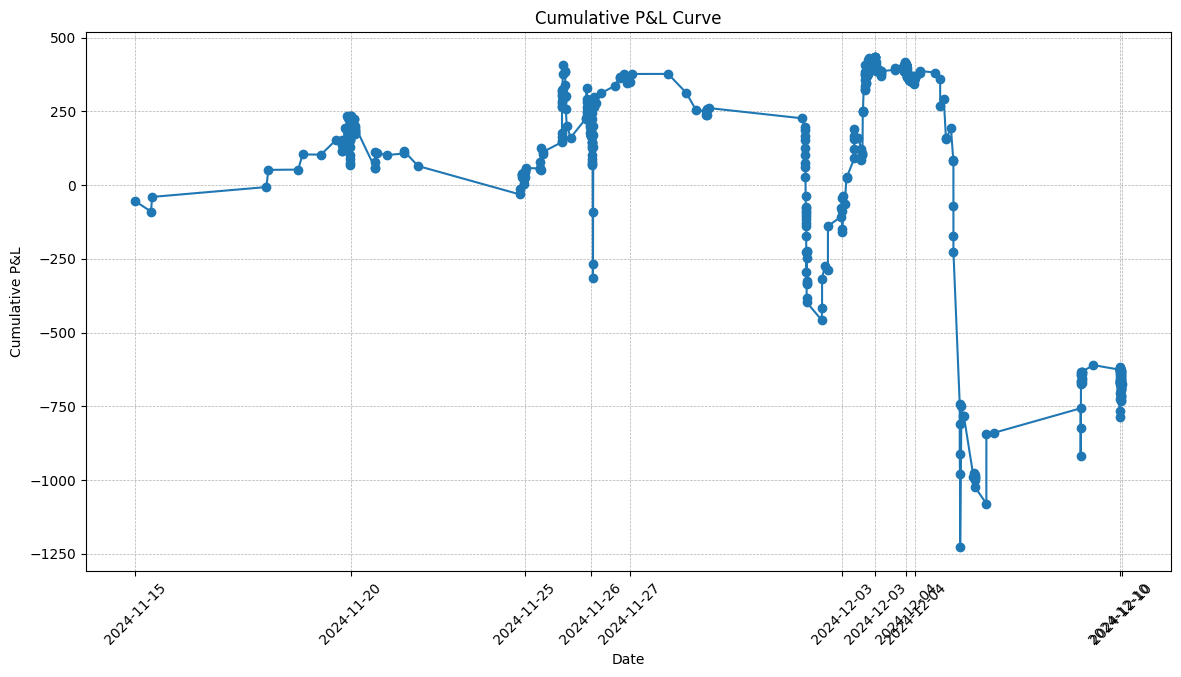

In [18]:
# Calculate Cumulative PL
trades['Cumulative PL'] = trades['PL'].cumsum()

plt.figure(figsize=(14, 7))
plt.plot(trades['DATE/TIME'], trades['Cumulative PL'], marker='o', linestyle='-')
plt.title('Cumulative P&L Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L')

# Set x-axis format to show fewer ticks
plt.xticks(ticks=trades['DATE/TIME'][::len(trades)//10], rotation=45)  # Show every 10th date for clarity

# Adjust gridlines
plt.grid(visible=True, linestyle='--', linewidth=0.5)  # Change line style and width
plt.show()


# EDGE ANALYSIS

In [19]:
# Calculate total trades
total_trades = len(trades)

# Calculate win and loss counts
wins = trades[trades['PL'] > 0]
losses = trades[trades['PL'] <= 0]

# Calculate win rate and loss rate
win_rate = len(wins) / total_trades
loss_rate = len(losses) / total_trades

# Calculate average win and average loss
average_win = wins['PL'].mean() if not wins.empty else 0
average_loss = losses['PL'].mean() if not losses.empty else 0

# Calculate expectancy
expectancy = (win_rate * average_win) + (loss_rate * average_loss)

# Display the results
print(f'Win Rate: {win_rate:.2f}')
print(f'Loss Rate: {loss_rate:.2f}')
print(f'Average Win: ${average_win:.2f}')
print(f'Average Loss: ${average_loss:.2f}')
print(f'Expectancy: ${expectancy:.2f}')


Win Rate: 0.46
Loss Rate: 0.54
Average Win: $24.57
Average Loss: $-23.19
Expectancy: $-1.32


In [20]:
# Calculate total trades
total_trades = len(trades)

# Calculate win and loss counts
wins = trades[trades['PL'] > 0]
losses = trades[trades['PL'] <= 0]

# Calculate win rate and loss rate
win_rate = len(wins) / total_trades
loss_rate = len(losses) / total_trades

# Calculate average win and average loss
average_win = wins['PL'].mean() if not wins.empty else 0
average_loss = losses['PL'].mean() if not losses.empty else 0

# Calculate expectancy
expectancy = (win_rate * average_win) + (loss_rate * average_loss)

# Calculate risk-to-reward ratio
risk_to_reward_ratio = abs(average_loss / average_win) if average_win != 0 else None

# Display the results
print(f'Win Rate: {win_rate:.2f}')
print(f'Loss Rate: {loss_rate:.2f}')
print(f'Average Win: ${average_win:.2f}')
print(f'Average Loss: ${average_loss:.2f}')
print(f'Expectancy: ${expectancy:.2f}')
print(f'Risk-to-Reward Ratio: {risk_to_reward_ratio:.2f}' if risk_to_reward_ratio is not None else 'Risk-to-Reward Ratio: Undefined (Average Win is zero)')


Win Rate: 0.46
Loss Rate: 0.54
Average Win: $24.57
Average Loss: $-23.19
Expectancy: $-1.32
Risk-to-Reward Ratio: 0.94


# Update github

Navigate to Your Project Directory: Make sure you are in the correct directory where your Git repository is located (e.g., C:\Users\user\Documents\Algo Trading\Trading Analytics). Use the cd command to change directories:

cd "C:\Users\user\Documents\Algo Trading\Trading Analytics"

Check Git Status Again: After changing to the correct directory, run:

git status

You should see the status of your Git repository, including any changes you've made.

Stage Your Changes: If you see the modified files that you want to commit, stage them using:

git add .

Commit Your Changes: After staging, commit your changes:

git commit -m "overall stats and edge"

1/ can i do a new commit before git push. 2/ or can i delete the previous commit or change it 3/ if yes do i have to do git add again 4/ what's best practice if i make a mistake with git commit (do new git commit , delete previous, or it does mkatter as long as i have not done git push)
Great questions! Let’s go through each of your queries step-by-step:

1. Can I do a new commit before git push?
Yes, you can create a new commit at any time before you push to the remote repository. Each commit is independent, and you can have multiple commits waiting to be pushed.

2. Can I delete the previous commit or change it?
Yes, you can modify the last commit using the following methods:

Amend the Last Commit: If you want to change the last commit (e.g., to modify the commit message or add changes), you can use:

git commit --amend

This will allow you to modify the last commit. You may need to stage any new changes with git add before using this command.

Delete the Last Commit: If you want to remove the last commit entirely and reset your branch to the previous state, you can use:

git reset --soft HEAD~1

This will keep your changes in the working directory (unstaged), allowing you to recommit them if needed.

If you prefer to discard the changes along with the commit:

git reset --hard HEAD~1

3. If yes, do I have to do git add again?
If you use git commit --amend, you should stage any new changes with git add before amending.
If you use git reset --soft HEAD~1, your changes remain in the working directory, so you can modify and stage them again as needed.
If you use git reset --hard HEAD~1, your changes will be lost, and you would not need to do git add again since there would be no changes.
4. What's best practice if I make a mistake with git commit?
The best practice depends on the situation:

If you need to change the last commit: Use git commit --amend if it's a minor change (like fixing a typo in the commit message or adding a small change).

If you want to start over with the last commit: Use git reset --soft HEAD~1 to keep your changes for further editing or git reset --hard HEAD~1 if you want to discard everything and start fresh.

If everything is correct: If you haven’t pushed yet and everything looks good, simply continue working as planned. You can always make new commits as needed.

# Edge per product

In [21]:
import pandas as pd

# Load your trading data (assuming it's already done)
# trades = pd.read_csv('refined_history.csv')

# Get unique products from the 'PRODUCT' column
unique_products = trades['PRODUCT'].unique().tolist()

# Display the unique products
print(f"PRODUCTS = {unique_products}")


PRODUCTS = ['Crude Oil West Texas - Cash', 'USD/JPY', 'US 30 - Cash', 'Gold - Cash', 'AUD/USD', 'USD/CAD', 'Crude Oil West Texas - Jan 2025', 'GBP/JPY', 'Japan 225 - Cash', 'US NDAQ 100 - Cash', 'US T-Note 10 YR - Cash', 'Heating Oil - Cash', 'Gasoline - Cash', 'GBP/USD', 'Germany 40 - Cash', 'Japan 225 - Dec 2024', 'EU Natural Gas (TTF) - Jan 2025', 'USD/CHF', 'US NDAQ 100 - Dec 2024', 'Soybean - Cash', 'Euro 50 - Cash', 'Copper - Cash']


In [22]:
filtered_trades = trades[trades['PRODUCT'].isin(unique_products)]


In [23]:
# Count the number of unique products
num_unique_products = trades['PRODUCT'].nunique()

# Display the result
print(f'Number of unique products: {num_unique_products}')




Number of unique products: 22


In [24]:
results = []

# Calculate the overall total trades across all products
overall_total_trades = len(trades)

for product in unique_products:
    product_data = trades[trades['PRODUCT'] == product]
    total_trades = len(product_data)  # Total trades (wins + losses)
    
    wins = product_data[product_data['PL'] > 0]
    losses = product_data[product_data['PL'] <= 0]

    win_count = len(wins)
    loss_count = len(losses)

    average_win = wins['PL'].mean() if not wins.empty else 0
    average_loss = losses['PL'].mean() if not losses.empty else 0

    win_rate = (win_count / total_trades) * 100 if total_trades > 0 else 0
    edge = (win_count / total_trades * average_win) + (loss_count / total_trades * average_loss) if total_trades > 0 else 0

    # Calculate percentage of total trades for this product and round it to 2 decimal places
    percentage_of_total_trades = round((total_trades / overall_total_trades) * 100, 2) if overall_total_trades > 0 else 0

    # Calculate RRR (Average Win / Average Loss)
    rrr = average_win / abs(average_loss) if average_loss != 0 else None

    # Append results to the DataFrame including Total Trades, Percentage, and RRR
    results.append({
        'Product': product,
        'Total Trades': total_trades,  # Total number of trades for this product
        '% of Total Trades': percentage_of_total_trades,  # New column for percentage rounded
        'Wins': win_count,
        'Average Win': average_win,
        'Losses': loss_count,
        'Average Loss': average_loss,
        'Edge': edge,
        '% Win': win_rate,
        'RRR': rrr,  # New column for Risk-to-Reward Ratio
    })

summary_df = pd.DataFrame(results)
print(summary_df)


                            Product  Total Trades  % of Total Trades  Wins  \
0       Crude Oil West Texas - Cash            70              13.70    32   
1                           USD/JPY            14               2.74     7   
2                      US 30 - Cash           105              20.55    47   
3                       Gold - Cash            40               7.83    20   
4                           AUD/USD             3               0.59     2   
5                           USD/CAD             8               1.57     2   
6   Crude Oil West Texas - Jan 2025            18               3.52    10   
7                           GBP/JPY            21               4.11    13   
8                  Japan 225 - Cash           135              26.42    61   
9                US NDAQ 100 - Cash            52              10.18    22   
10           US T-Note 10 YR - Cash             3               0.59     3   
11               Heating Oil - Cash             2               

In [25]:
# Calculate percentage of total trades for this product
percentage_of_total_trades = round((total_trades / overall_total_trades) * 100, 2) if overall_total_trades > 0 else 0

# Append results to the DataFrame including Total Trades and Percentage
results.append({
    'Product': product,
    'Total Trades': total_trades,
    '% of Total Trades': percentage_of_total_trades,  # New column for percentage rounded
    'Wins': win_count,
    'Average Win': average_win,
    'Losses': loss_count,
    'Average Loss': average_loss,
    'Edge': edge,
    '% Win': win_rate,
})


In [26]:
import pandas as pd

# Assuming summary_df is already created and contains your edge data

# Specify the path to your refined_history file
refined_history_path = 'refined_history.xlsx'  # Update with the actual path if necessary

# Create an Excel writer object (this will create a new file if it doesn't exist)
with pd.ExcelWriter(refined_history_path, engine='openpyxl') as writer:
    # Write the summary_df to a new sheet named 'edges'
    summary_df.to_excel(writer, sheet_name='edges', index=False)

print("Data saved to 'refined_history.xlsx' in the 'edges' sheet.")



Data saved to 'refined_history.xlsx' in the 'edges' sheet.


In [27]:
refined_history_path = r'C:\Users\user\Documents\Algo Trading\refined_history.xlsx'


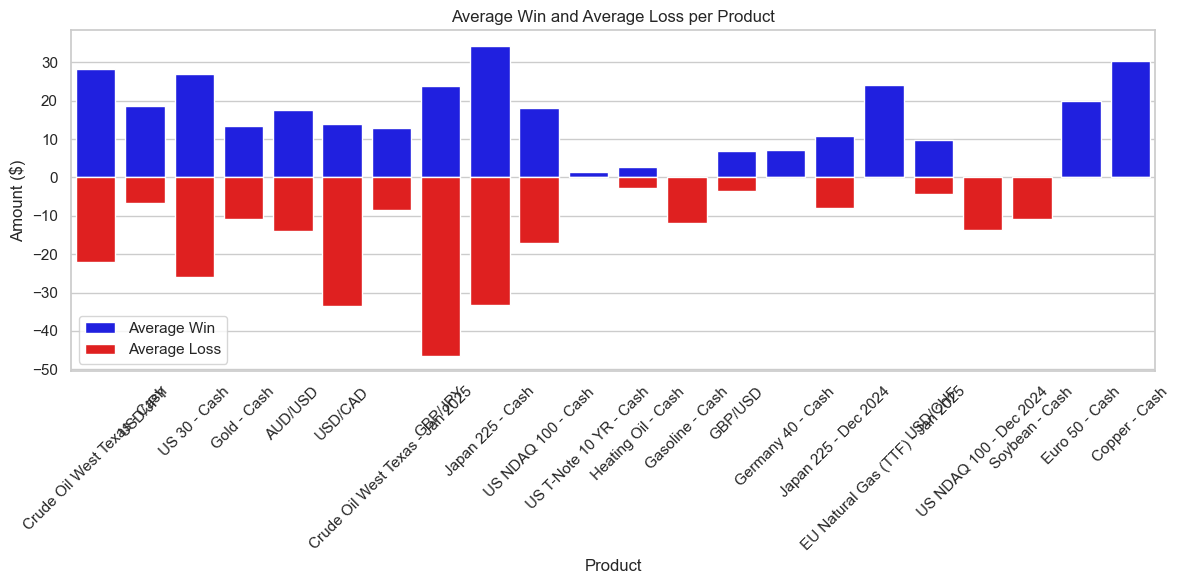

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot Average Win vs Average Loss
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Average Win', data=summary_df, color='blue', label='Average Win')
sns.barplot(x='Product', y='Average Loss', data=summary_df, color='red', label='Average Loss')

plt.title('Average Win and Average Loss per Product')
plt.xlabel('Product')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9364\2318123739.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(summary_df['Product'], rotation=45)


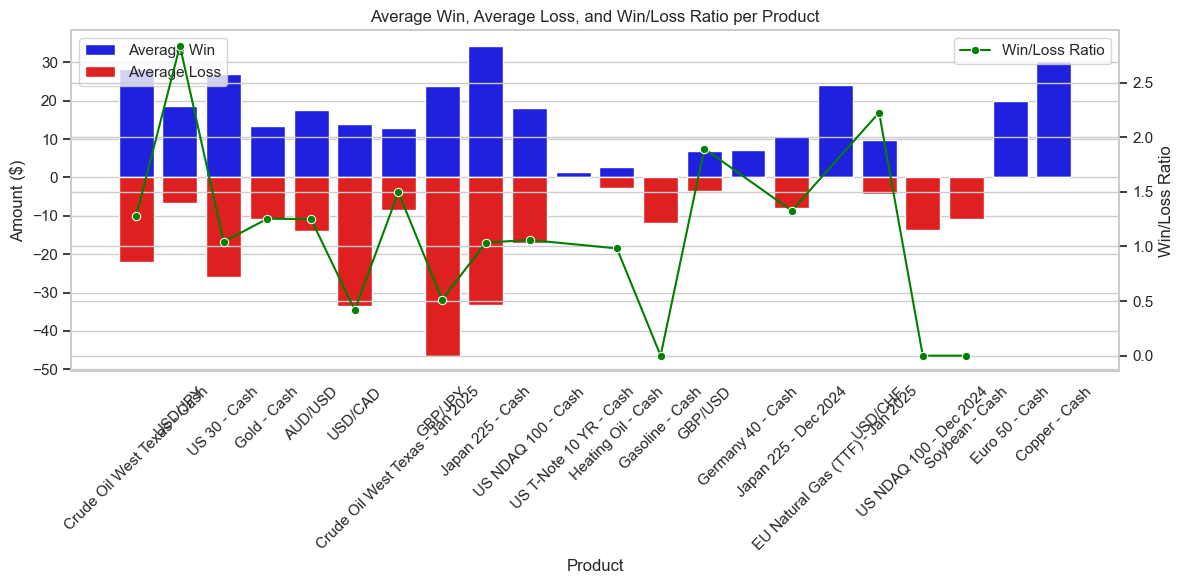

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the ratio of Average Win to Average Loss
summary_df['Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Average Win and Average Loss
sns.barplot(x='Product', y='Average Win', data=summary_df, color='blue', ax=ax1, label='Average Win')
sns.barplot(x='Product', y='Average Loss', data=summary_df, color='red', ax=ax1, label='Average Loss')

# Set the labels and title
ax1.set_title('Average Win, Average Loss, and Win/Loss Ratio per Product')
ax1.set_xlabel('Product')
ax1.set_ylabel('Amount ($)')
ax1.set_xticklabels(summary_df['Product'], rotation=45)
ax1.legend(loc='upper left')

# Create a secondary axis for the Win/Loss Ratio
ax2 = ax1.twinx()
sns.lineplot(x='Product', y='Win/Loss Ratio', data=summary_df, color='green', marker='o', ax=ax2, label='Win/Loss Ratio')

# Set the secondary axis label
ax2.set_ylabel('Win/Loss Ratio')

# Show the legend for the secondary axis
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


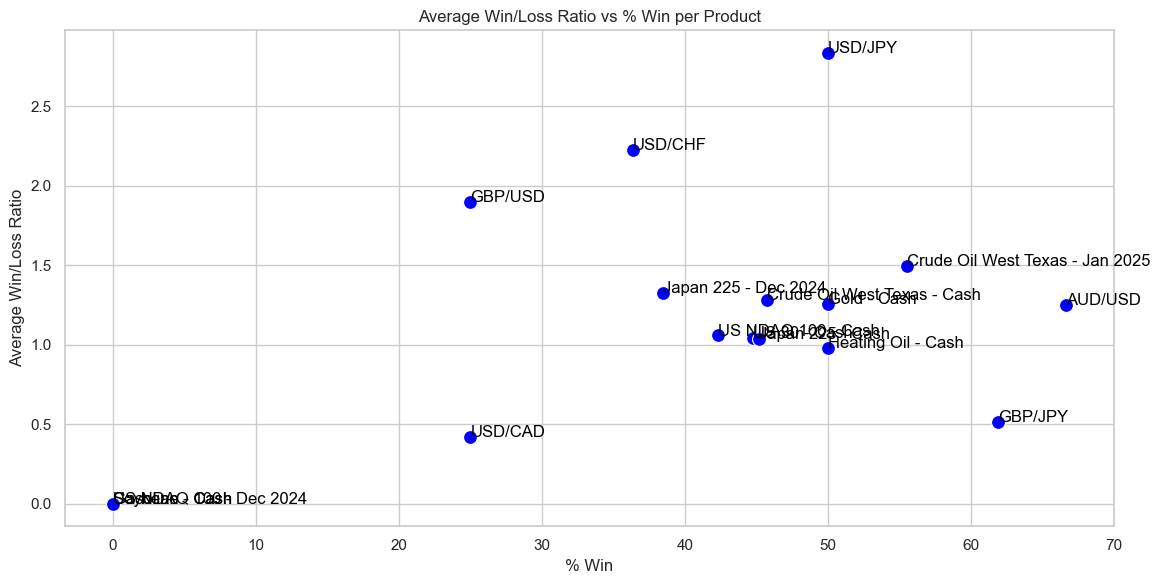

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the summary_df DataFrame with the necessary columns

# Calculate average win/average loss ratio
summary_df['Average Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='% Win', y='Average Win/Loss Ratio', data=summary_df, color='blue', s=100)

# Set titles and labels
plt.title('Average Win/Loss Ratio vs % Win per Product')
plt.xlabel('% Win')
plt.ylabel('Average Win/Loss Ratio')

# Annotate each point with the product name
for i in range(len(summary_df)):
    plt.text(summary_df['% Win'][i], summary_df['Average Win/Loss Ratio'][i], 
             summary_df['Product'][i], horizontalalignment='left', size='medium', color='black')

# Show gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



In [31]:
summary_df['Average Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])


In [32]:
import pandas as pd

# Load your trading data (assuming it's already done)
# trades = pd.read_csv('Trading_Data.csv')

# Create a sample trades DataFrame for demonstration
# trades = pd.DataFrame({
#     'PRODUCT': ['Product A', 'Product A', 'Product B', 'Product B', 'Product A'],
#     'PL': [30, -10, 20, -5, 40]
# })

# Group data by PRODUCT
grouped = trades.groupby('PRODUCT')

# Prepare a results DataFrame
results = pd.DataFrame(columns=['Product', 'Total Trades', 'Win Rate', 'Average Win', 'Average Loss', 'Expectancy'])

for product, group in grouped:
    total_trades = len(group)
    wins = group[group['PL'] > 0]
    losses = group[group['PL'] <= 0]

    win_rate = len(wins) / total_trades if total_trades > 0 else 0
    average_win = wins['PL'].mean() if not wins.empty else 0
    average_loss = losses['PL'].mean() if not losses.empty else 0

    expectancy = (win_rate * average_win) + ((1 - win_rate) * average_loss)

    # Append results to the DataFrame
    results = results.append({
        'Product': product,
        'Total Trades': total_trades,
        'Win Rate': win_rate,
        'Average Win': average_win,
        'Average Loss': average_loss,
        'Expectancy': expectancy,
    }, ignore_index=True)

# Display the results
print(results)


AttributeError: 'DataFrame' object has no attribute 'append'